In [1]:
import os
import pickle
import numpy as np
import torch

from spenderq import load_model
from spenderq import util as U
from spenderq import lyalpha as LyA

In [2]:
from matplotlib import gridspec

In [3]:
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

# load SpenderQ model

In [4]:
#models, _ = load_model('/tigress/chhahn/spender_qso/models/dr1/qso.dr1.hiz.pt')
models, _ = load_model('/tigress/chhahn/spender_qso/models/dr1/qso.dr1.hiz.i3.pt')

/home/chhahn/projects/SpenderQ/src/spenderq/__init__.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_struct = torch.load(filename, map_location=device)


In [5]:
wave_obs = np.array(models[0].wave_obs)
#with open('/tigress/chhahn/spender_qso/train/dr1/DESI.dr1.qsohiz_0.pkl', "rb") as f:    
with open('/tigress/chhahn/spender_qso/train/dr1/DESI.dr1.qsohiz.i3_0.pkl', "rb") as f:    
    spec, w, z, target_id, norm, zerr = pickle.load(f)

/tmp/ipykernel_1590248/1339578923.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  wave_obs = np.array(models[0].wave_obs)


In [6]:
with torch.no_grad():
    models[0].eval()

    s = models[0].encode(spec)
    recon = np.array(models[0].decode(s))

/tmp/ipykernel_1590248/4022405104.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  recon = np.array(models[0].decode(s))


In [7]:
w_recon = np.array(models[0].wave_rest)

/tmp/ipykernel_1590248/2390545513.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  w_recon = np.array(models[0].wave_rest)


# examine some reconstructions

/tmp/ipykernel_1590248/2616051395.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  wave_rebin = np.arange(models[0].wave_obs[0], models[0].wave_obs[-1], 10)[1:-1]
/tmp/ipykernel_1590248/2616051395.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
/tmp/ipykernel_1590248/2616051395.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
/tmp/ipykernel_1590248/2616051395.py:11: DeprecationWarning: __array__ implementation doesn't

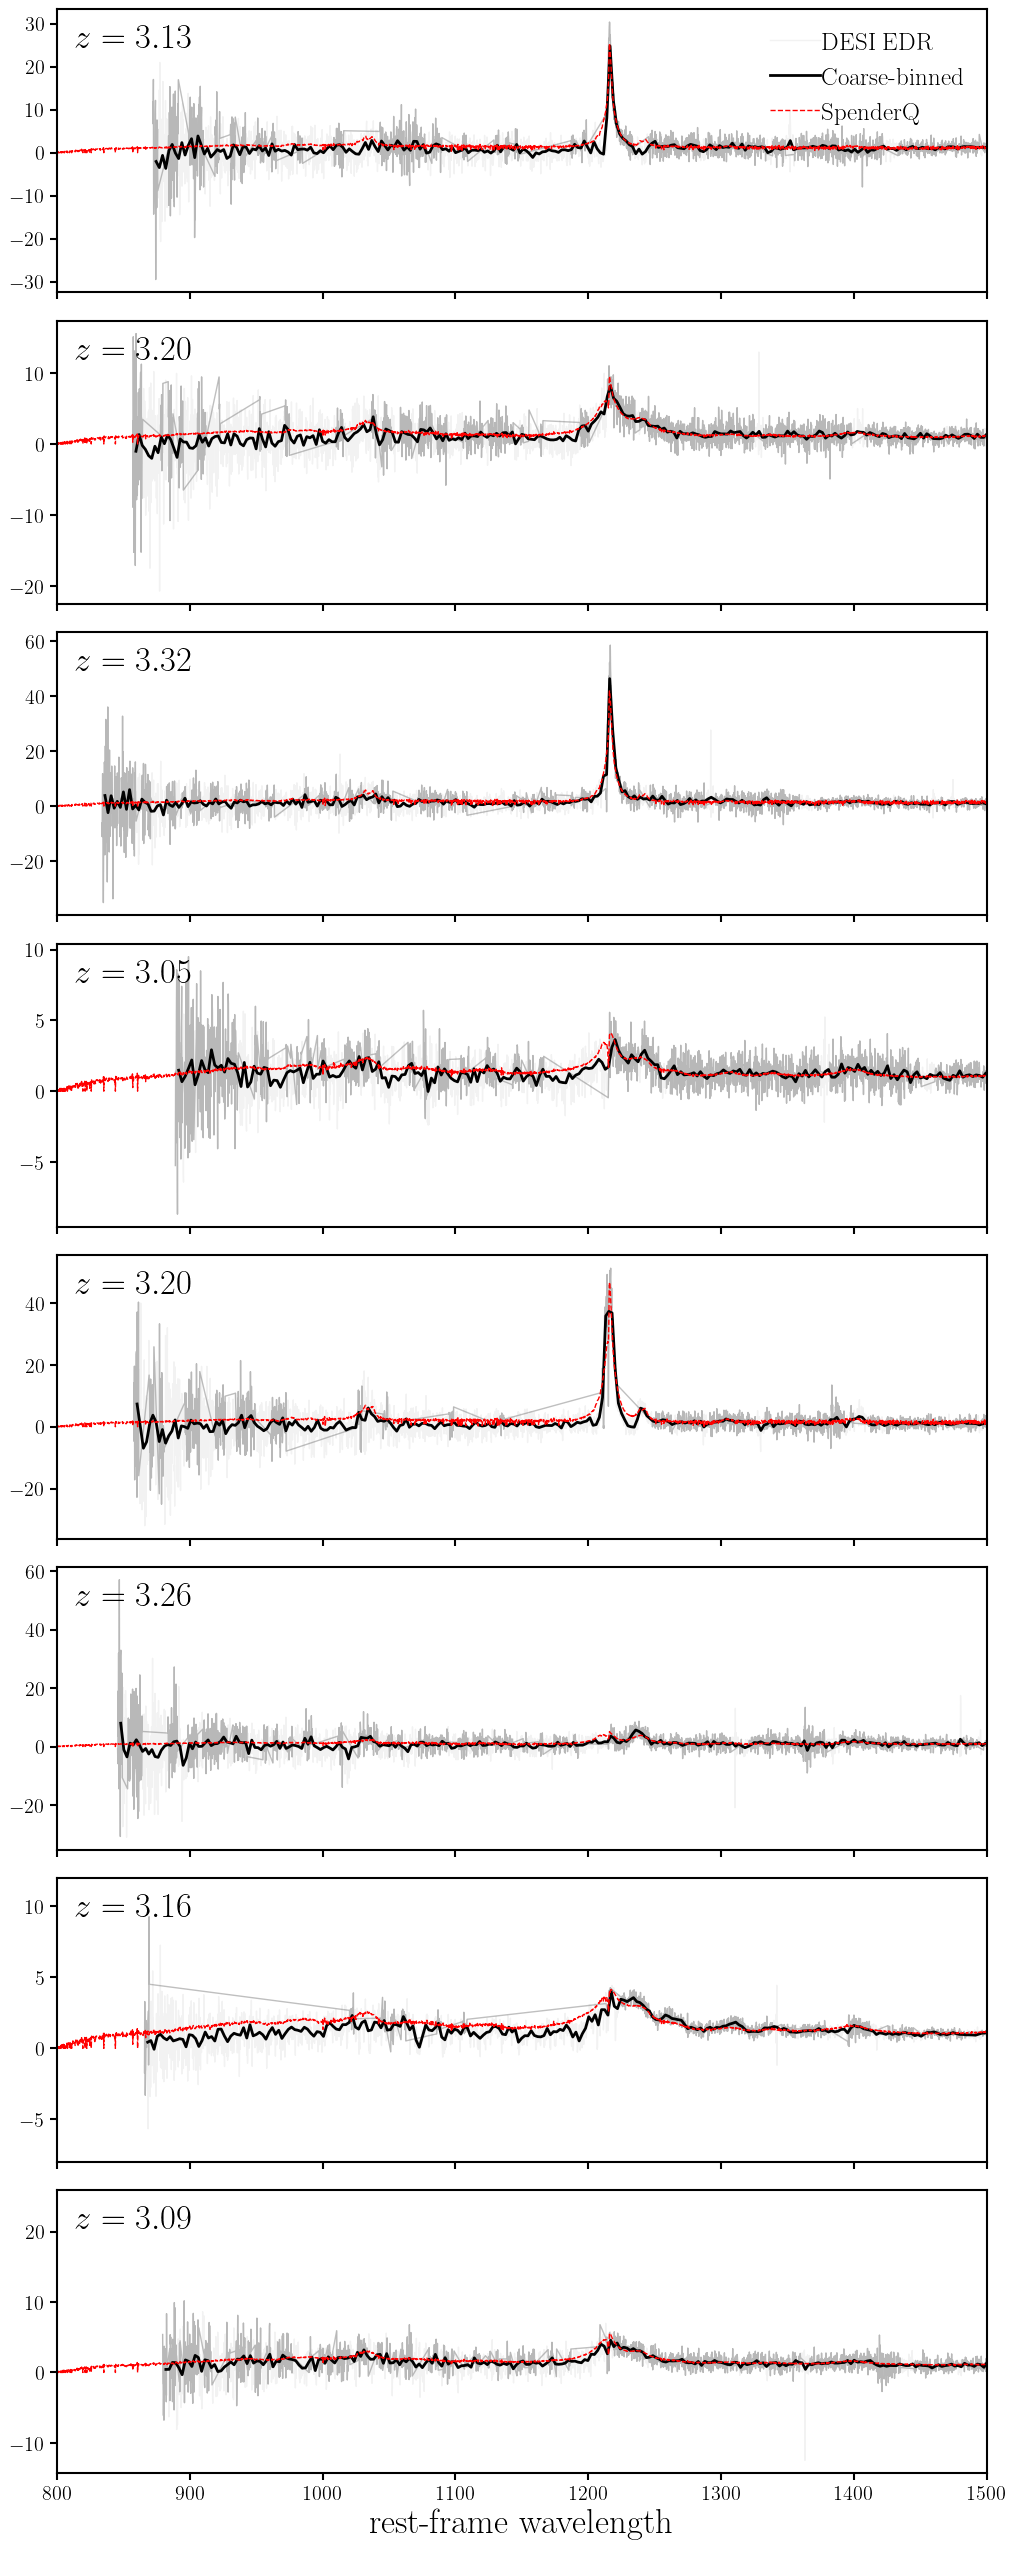

In [8]:
highzs = np.arange(len(z))[z > 3.0][:8]

fig = plt.figure(figsize=(12,4*len(highzs)))

wave_rebin = np.arange(models[0].wave_obs[0], models[0].wave_obs[-1], 10)[1:-1]
for ii, igal in enumerate(highzs):
    sub = fig.add_subplot(len(highzs), 1, ii+1)
    sub.plot(models[0].wave_obs/(1 + z[igal]), spec[igal], c='gray', alpha=0.1, lw=1, label='DESI EDR')
    sub.plot((models[0].wave_obs/(1 + z[igal]))[w[igal] > 0], (spec[igal])[w[igal] > 0], c='gray', alpha=0.5, lw=1)

    spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
    sub.plot(wave_rebin/(1+z[igal]), spec_rebin, c='k', lw=2, label='Coarse-binned')

    # SpenderQ
    sub.plot(models[0].wave_rest, recon[igal], color='r', lw=1, ls='--', label='SpenderQ')
    
    sub.text(0.02, 0.95, '$z=%.2f$' % z[igal], ha='left', va='top', fontsize=25, transform=sub.transAxes)

    sub.set_xlim(models[0].wave_rest[0], 1500.)#models[0].wave_rest[-1])
    if ii < len(highzs)-1: sub.set_xticklabels([])
    if ii == 0: sub.legend(loc='upper right', fontsize=18, handletextpad=0.1)
sub.set_xlabel("rest-frame wavelength", fontsize=25)
fig.subplots_adjust(hspace=0.1)
plt.show()

/tmp/ipykernel_1590248/3901560047.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  wave_rebin = np.arange(models[0].wave_obs[0], models[0].wave_obs[-1], 10)[1:-1]
/tmp/ipykernel_1590248/3901560047.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
/tmp/ipykernel_1590248/3901560047.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
/tmp/ipykernel_1590248/3901560047.py:9: DeprecationWarning: __array__ implementation doesn't ac

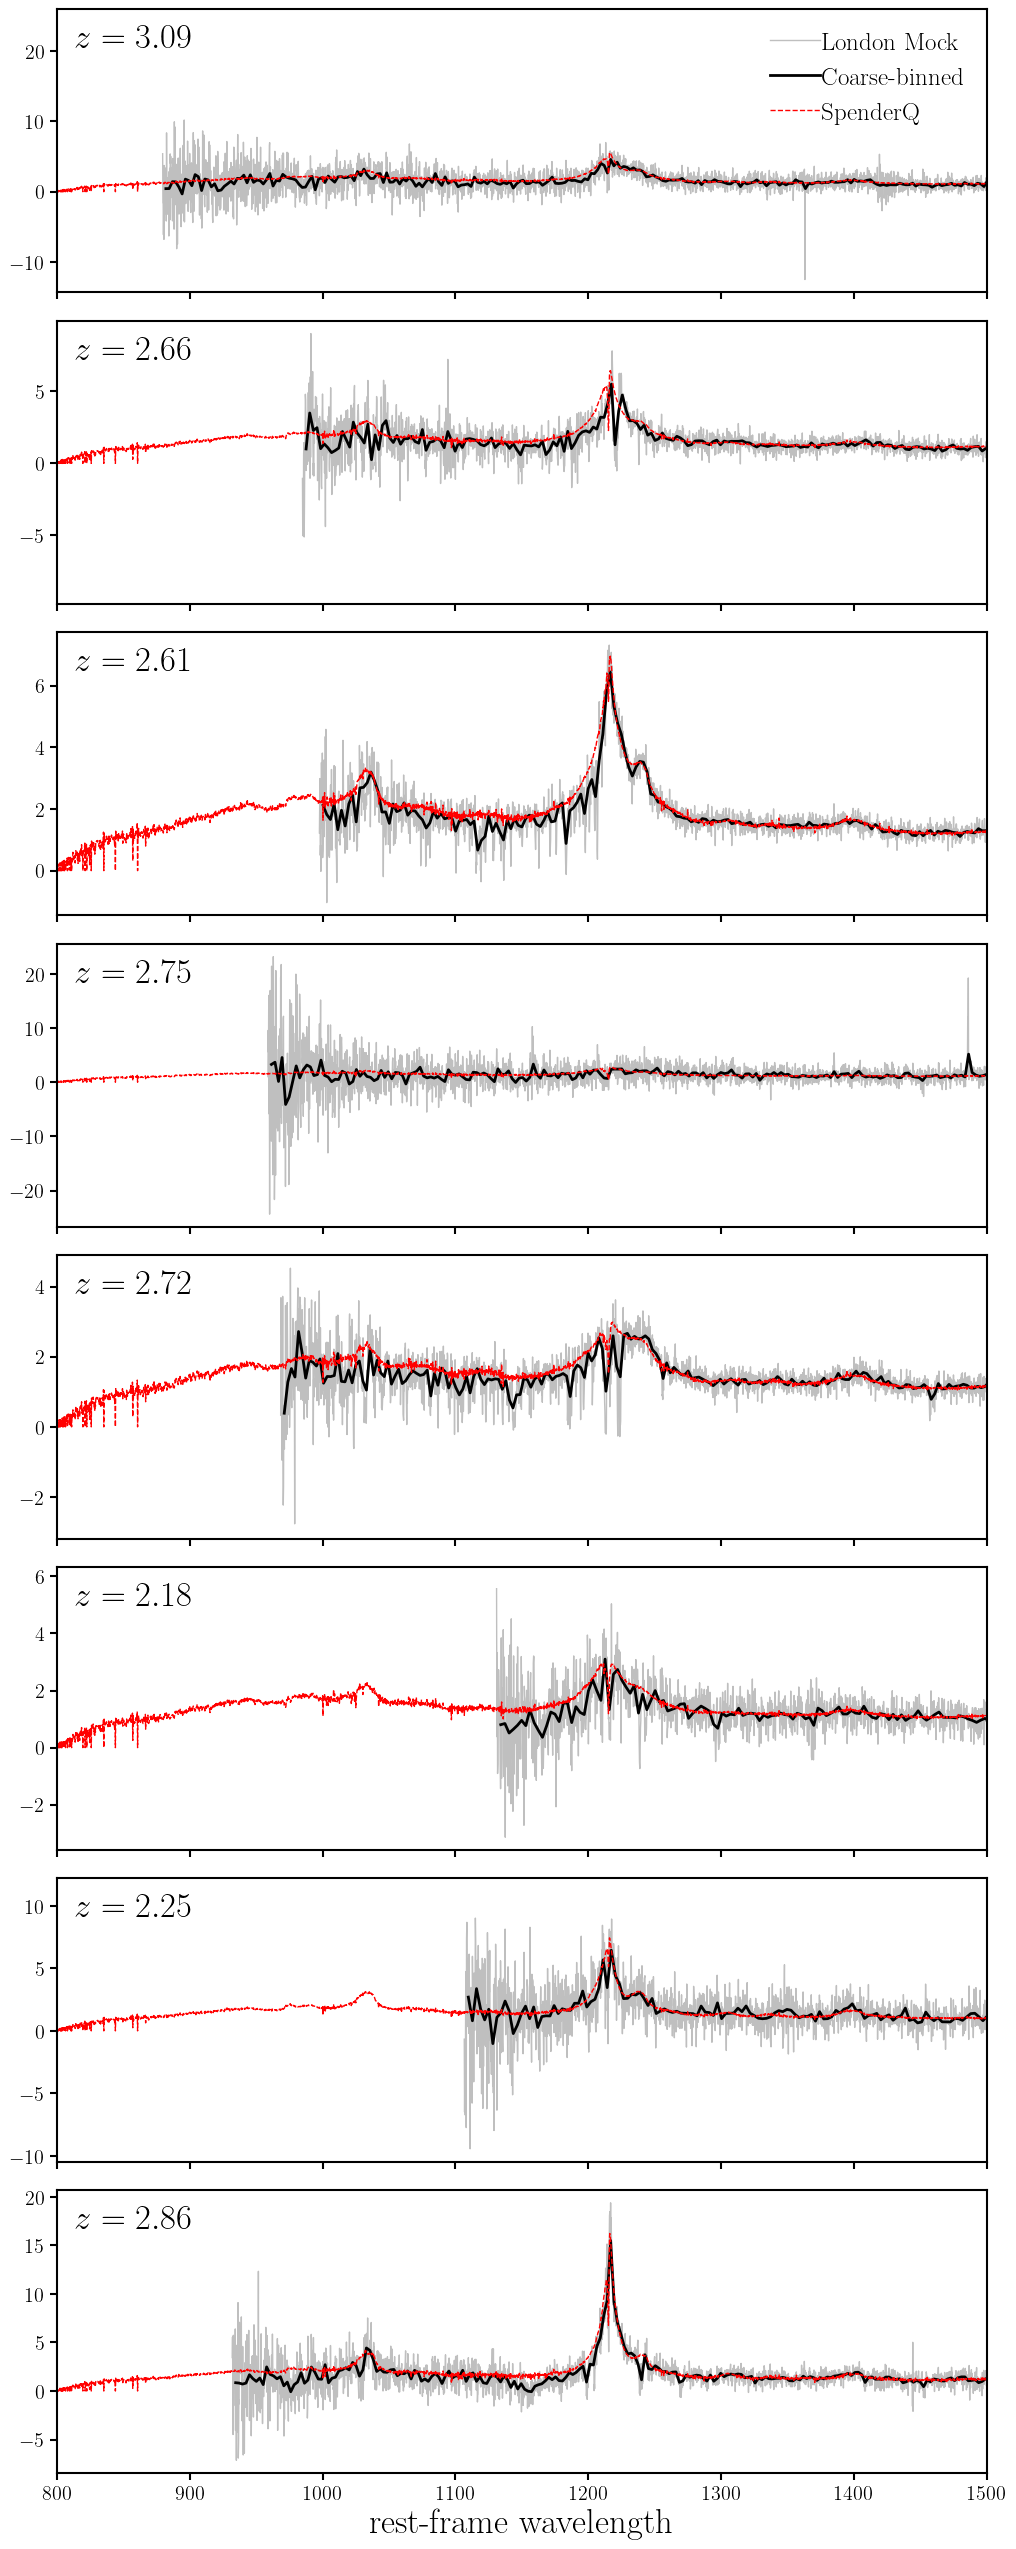

In [9]:
fig = plt.figure(figsize=(12,4*len(highzs)))

wave_rebin = np.arange(models[0].wave_obs[0], models[0].wave_obs[-1], 10)[1:-1]
for ii, igal in enumerate(np.random.choice(np.arange(len(z)), size=8, replace=False)):
    sub = fig.add_subplot(len(highzs), 1, ii+1)
    sub.plot(models[0].wave_obs/(1 + z[igal]), spec[igal], c='gray', alpha=0.5, lw=1, label='London Mock')
    #sub.plot((models[0].wave_obs/(1 + z[igal]))[w[igal] > 0], (spec[igal])[w[igal] > 0], c='gray', alpha=0.5, lw=1)

    spec_rebin = U.trapz_rebin(np.array(models[0].wave_obs), np.array(spec[igal]), xnew=wave_rebin)
    sub.plot(wave_rebin/(1+z[igal]), spec_rebin, c='k', lw=2, label='Coarse-binned')

    # SpenderQ
    sub.plot(models[0].wave_rest, recon[igal], color='r', lw=1, ls='--', label='SpenderQ')
    
    sub.text(0.02, 0.95, '$z=%.2f$' % z[igal], ha='left', va='top', fontsize=25, transform=sub.transAxes)

    sub.set_xlim(models[0].wave_rest[0], 1500.)#models[0].wave_rest[-1])
    if ii < len(highzs)-1: sub.set_xticklabels([])
    if ii == 0: sub.legend(loc='upper right', fontsize=18, handletextpad=0.1)
sub.set_xlabel("rest-frame wavelength", fontsize=25)
fig.subplots_adjust(hspace=0.1)
plt.show()

# check out the reconstructions

In [22]:
A1100_recon = np.ones(len(z))
for i, _recon in enumerate(recon): 
    A1100_recon[i] = np.interp(1100., models[0].wave_rest, _recon)

In [31]:
recon_q = np.quantile(recon/A1100_recon[:,None], [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)

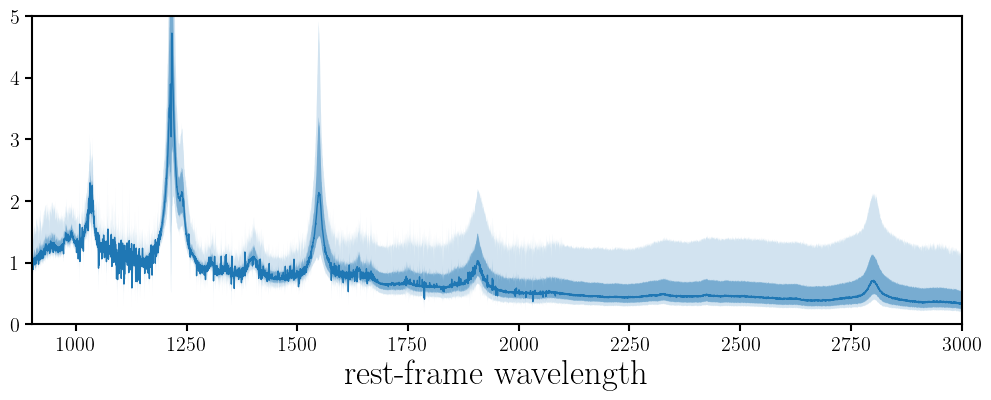

In [41]:
fig = plt.figure(figsize=(12,4))
sub = fig.add_subplot(111)

sub.fill_between(models[0].wave_rest, recon_q[0], recon_q[-1], color='C0', edgecolor='none', alpha=0.2)
sub.fill_between(models[0].wave_rest, recon_q[1], recon_q[-2], color='C0', edgecolor='none', alpha=0.5)
sub.plot(models[0].wave_rest, recon_q[2], color='C0', lw=1)

#for ii, igal in enumerate(np.random.choice(np.arange(len(z)), size=10, replace=False)):
#    # SpenderQ
#    sub.plot(models[0].wave_rest[::10], recon[igal][::10]/A1100_recon[igal], lw=1, label='SpenderQ')

    
sub.set_xlim(900, 3000.)#models[0].wave_rest[-1])
sub.set_xlabel("rest-frame wavelength", fontsize=25)
sub.set_ylim(0., 5.)
#fig.subplots_adjust(hspace=0.1)
plt.show()